Importing The Libraries

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Model Architecture

In [ ]:
encoding_dim = 15
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

Encoder and Decoder Models

In [ ]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

Model Compilation

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Data Preparation

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)


Model Fitting

In [ ]:
autoencoder.fit(
x_train, x_train,
epochs=15,
batch_size=256,
validation_data=(x_test, x_test)
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4144 - val_loss: 0.2207
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2091 - val_loss: 0.1824
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1786 - val_loss: 0.1646
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1626 - val_loss: 0.1537
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1529 - val_loss: 0.1476
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1480 - val_loss: 0.1445
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1452 - val_loss: 0.1424
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1431 - val_loss: 0.1409
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1417 - val_loss: 0.1395
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1403 - val_loss: 0.1381
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1391 - val_loss: 0.1369
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/st

Evaluation and Visualization

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Original image


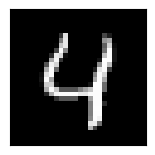

In [ ]:
plt.figure(figsize=(20, 6))
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
import random
i = random.randint(0, 10)
print("Original image")
ax = plt.subplot(3, 1, 1)
plt.imshow(x_test[i].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

Encoded image


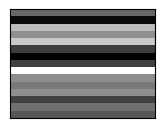

In [ ]:
print("Encoded image")
encoded_image = encoded_img[i].reshape(encoding_dim, 1)
ax = plt.subplot(3, 1, 2)
plt.imshow(encoded_image, aspect=0.05)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

Reconstructed image after decoding


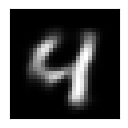

In [ ]:
print("Reconstructed image after decoding")
ax = plt.subplot(3, 1, 3)
plt.imshow(decoded_img[i].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()